# Temperature insensitivity test

In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import re
from pandas import ExcelWriter
from datetime import datetime
import os
from functools import reduce 
import numpy as np


os.chdir(r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\121323-d1114-1-w-tempstab")

C:\Users\desi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\desi\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
col_L = "#A1A9D0"
col_R = "#B883D4"
col_diff = "#F0988C"

In [3]:
col_L = "#FFBE7A"
col_R = "#FA7F6F"
col_diff = "#82B0D2"

In [4]:
df_t = {}
temp = ['25','27','29','30','31','33','35','37','40']
for t in temp: df_t[t] = [pd.read_excel(str(os.getcwd())+'\\'+excelfile) for excelfile in os.listdir(str(os.getcwd())) if excelfile.endswith('.xls') and t in excelfile]

WARNING *** file size (44270) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44282) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44326) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44306) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44322) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44278) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44262) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero

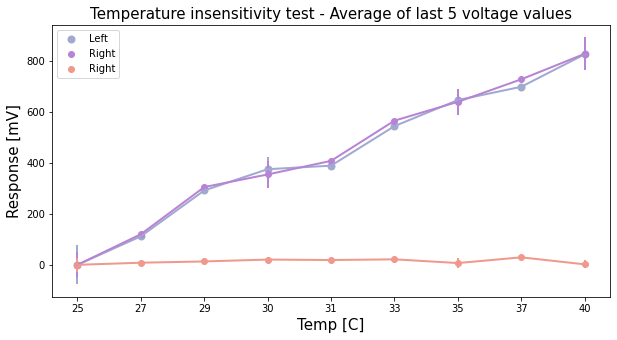

In [15]:
max_std_t = []
for i in temp:
    max_std_t.append([np.mean(np.mean([k[['DrainVLeft','DrainVRight']].iloc[-5:] for k in df_t[i]],1),0),np.std(np.mean([k[['DrainVLeft','DrainVRight']].iloc[-5:] for k in df_t[i]],1),0)])
    
fig, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(temp,[abs(i[0][0]-max_std_t[0][0][0])*1000 for i in max_std_t], label = 'Left', color = col_L, linewidth = 2)
plt.errorbar(temp,[abs(i[0][0]-max_std_t[0][0][0])*1000 for i in max_std_t], yerr = [i[1][0]*1000 for i in max_std_t] , color = col_L,linewidth = 2)
plt.scatter(temp,[abs(i[0][1]-max_std_t[0][0][1])*1000 for i in max_std_t], label = 'Right', color = col_R)
plt.errorbar(temp,[abs(i[0][1]-max_std_t[0][0][1])*1000 for i in max_std_t], yerr = [i[1][1]*1000 for i in max_std_t], color = col_R,linewidth = 2)
plt.scatter(temp,abs(np.array([i[0][1]-max_std_t[0][0][1] for i in max_std_t]) - np.array([i[0][0]-max_std_t[0][0][0] for i in max_std_t]))*1000, label = 'Right', color = col_diff)
plt.errorbar(temp,abs(np.array([i[0][1]-max_std_t[0][0][1] for i in max_std_t]) - np.array([i[0][0]-max_std_t[0][0][0] for i in max_std_t]))*1000, yerr = [np.std(np.diff(np.mean([k[['DrainVLeft','DrainVRight']].iloc[-5:] for k in df_t[t]],1)))*1000 for t in temp], color = col_diff,linewidth = 2)
plt.legend()
plt.xlabel('Temp [C]',fontsize = 15)
plt.ylabel('Response [mV]',fontsize = 15)
plt.title('Temperature insensitivity test - Average of last 5 voltage values',fontsize = 15)
plt.savefig(r'C:\Users\Desi\Desktop\TesiStanford\images-results\TempInsensitivyTest-121323.jpeg')

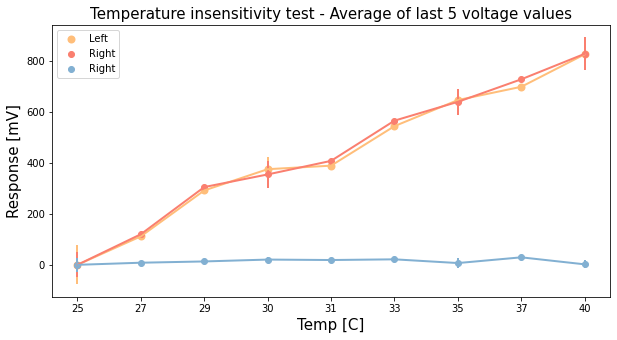

In [21]:
max_std_t = []
for i in temp:
    max_std_t.append([np.mean(np.mean([k[['DrainVLeft','DrainVRight']].iloc[-5:] for k in df_t[i]],1),0),np.std(np.mean([k[['DrainVLeft','DrainVRight']].iloc[-5:] for k in df_t[i]],1),0)])
    
fig, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(temp,[abs(i[0][0]-max_std_t[0][0][0])*1000 for i in max_std_t], label = 'Left', color = col_L, linewidth = 2)
plt.errorbar(temp,[abs(i[0][0]-max_std_t[0][0][0])*1000 for i in max_std_t], yerr = [i[1][0]*1000 for i in max_std_t] , color = col_L,linewidth = 2)
plt.scatter(temp,[abs(i[0][1]-max_std_t[0][0][1])*1000 for i in max_std_t], label = 'Right', color = col_R)
plt.errorbar(temp,[abs(i[0][1]-max_std_t[0][0][1])*1000 for i in max_std_t], yerr = [i[1][1]*1000 for i in max_std_t], color = col_R,linewidth = 2)
plt.scatter(temp,abs(np.array([i[0][1]-max_std_t[0][0][1] for i in max_std_t]) - np.array([i[0][0]-max_std_t[0][0][0] for i in max_std_t]))*1000, label = 'Right', color = col_diff)
plt.errorbar(temp,abs(np.array([i[0][1]-max_std_t[0][0][1] for i in max_std_t]) - np.array([i[0][0]-max_std_t[0][0][0] for i in max_std_t]))*1000, yerr = [np.std(np.diff(np.mean([k[['DrainVLeft','DrainVRight']].iloc[-5:] for k in df_t[t]],1)))*1000 for t in temp], color = col_diff,linewidth = 2)
plt.legend()
plt.xlabel('Temp [C]',fontsize = 15)
plt.ylabel('Response [mV]',fontsize = 15)
plt.title('Temperature insensitivity test - Average of last 5 voltage values',fontsize = 15)
plt.savefig(r'C:\Users\Desi\Desktop\TesiStanford\images-results\TempInsensitivyTest-121323.jpeg')

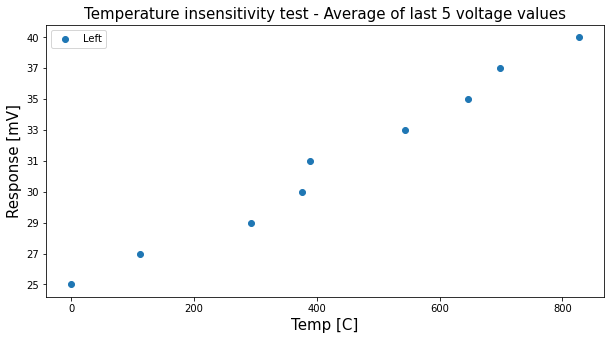

In [ ]:
max_std_t = []
for i in temp:
    max_std_t.append([np.mean(np.mean([k[['DrainVLeft','DrainVRight']].iloc[-5:] for k in df_t[i]],1),0),np.std(np.mean([k[['DrainVLeft','DrainVRight']].iloc[-5:] for k in df_t[i]],1),0)])
    
fig, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter([abs(i[0][0]-max_std_t[0][0][0])*1000 for i in max_std_t],temp, label = 'Left')
#plt.errorbar(temp,abs(np.array([i[0][1]-max_std_t[0][0][1] for i in max_std_t]) - np.array([i[0][0]-max_std_t[0][0][0] for i in max_std_t]))*1000, yerr = [np.std(np.diff(np.mean([k[['DrainVLeft','DrainVRight']].iloc[-5:] for k in df_t[t]],1)))*1000 for t in temp])
plt.legend()
plt.xlabel('Temp [C]',fontsize = 15)
plt.ylabel('Response [mV]',fontsize = 15)
plt.title('Temperature insensitivity test - Average of last 5 voltage values - Diff values',fontsize = 15)
plt.savefig(r'C:\Users\Desi\Desktop\TesiStanford\images-results\TempInsensitivyTest_DiffValues-121323.jpeg')

In [ ]:
#Saving data in xlsx format
max_ = [maxim[0] for maxim in max_std_t]
std = [maxim[1] for maxim in max_std_t]
data = [[i[0] for i in max_], [i[0] for i in std], [i[1] for i in max_], [i[1] for i in std], index]
table = pd.DataFrame(data).transpose().rename(columns = {0: 'Mean_L [V]', 1: 'std_L [V]', 2: 'Mean_R [V]', 3: 'std_R [V]', 4: 'temperature'}).set_index('temperature')

table['|VL-VR|[V]'] = abs(table['Mean_L [V]']- table['Mean_R [V]'])
table['std |VL-VR|[V]'] = [np.std(np.diff(np.mean([k[['DrainVLeft','DrainVRight']].iloc[-5:] for k in df_t[t]],1))) for t in temp]
table['Diff [V]'] = abs(table['Mean_L [V]']-table['Mean_R [V]'])
table.to_excel(r'C:\Users\Desi\Desktop\TesiStanford\images-results\table_TempInsensitivityTest-121323-1.xlsx')

In [ ]:
table

,Mean_L [V],Mean_R [V],std_L [V],std_R [V],Diff [V]
25C,2.988341,2.860542,0.077005,0.048479,0.127799
27C,2.876553,2.740480,0.000000,0.000000,0.136074
29C,2.696431,2.555349,0.000000,0.000000,0.141081
30C,2.613026,2.505822,0.046906,0.051288,0.107204
31C,2.599178,2.452540,0.000000,0.000000,0.146638
33C,2.444079,2.294721,0.000000,0.000000,0.149357
35C,2.341741,2.220892,0.031697,0.049775,0.120849
37C,2.289638,2.132439,0.000000,0.000000,0.157199
40C,2.162114,2.032416,0.048372,0.064575,0.129698


In [5]:
# sorting the files in the folder based on the acquisition time

search_dir = r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\121323-d1114-1-w-tempstab"

files = filter(os.path.isfile, os.listdir(search_dir))
files = [os.path.join(search_dir, f) for f in files] # add path to each file
files.sort(key=lambda x: os.path.getmtime(x))

In [6]:
df_t_order = []
df_t_order = [pd.read_excel(excelfile) for excelfile in files if excelfile.endswith('.xls')]

NameError: name 'files' is not defined

In [9]:
[(i[0] - max_t_ord[0][0]) * 1000 for i in max_t_ord]

C:\Users\Desi\AppData\Local\Temp\ipykernel_4964\3087073346.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [(i[0] - max_t_ord[0][0]) * 1000 for i in max_t_ord]


[0.0,
 -143.94969940185564,
 -324.0719795227052,
 -421.32463455200184,
 -576.4241218566895,
 -711.5476131439209,
 -730.8650493621824,
 -906.7609786987302,
 -701.1342525482175,
 -465.3196334838867,
 41.861343383788885,
 -350.43277740478504,
 -672.6536750793457,
 -810.0170135498046,
 -629.7111511230469,
 -406.67934417724626,
 -138.34753036499015]

In [5]:
max_t_ord = []
order = ['25','27','29','31','33','35','37','40','35','30','25','30','35','40','35','30','25']

max_t_ord = [np.mean(k[['DrainVLeft','DrainVRight']].iloc[-5:],0) for k in df_t_order]
    
fig, ax1 = plt.subplots(figsize=(10, 5))
plt.xticks(range(len(order)), order)
plt.scatter(range(len(order)), [(i[0] - max_t_ord[0][0]) * 1000 for i in max_t_ord], label='Left OFET', color = col_L, linewidth = 2)
plt.plot(range(len(order)), [(i[0] - max_t_ord[0][0]) * 1000 for i in max_t_ord], color = col_L, linewidth = 2)
plt.scatter(range(len(order)),[(i[1]-max_t_ord[0][1])*1000 for i in max_t_ord], label = 'Right OFET', color = col_R, linewidth = 2)
plt.plot(range(len(order)),[(i[1]-max_t_ord[0][1])*1000 for i in max_t_ord], color = col_R, linewidth = 2)
plt.scatter(range(len(order)),abs(np.array([i[1]-max_t_ord[0][1] for i in max_t_ord]) - np.array([i[0]-max_t_ord[0][0] for i in max_t_ord]))*1000, label = 'Abs Diff OFET', color = col_diff, linewidth = 2)
plt.plot(range(len(order)),abs(np.array([i[1]-max_t_ord[0][1] for i in max_t_ord]) - np.array([i[0]-max_t_ord[0][0] for i in max_t_ord]))*1000, color = col_diff, linewidth = 2)

plt.legend()
ax1.tick_params(axis='both', labelsize=11)
plt.xlabel('Temperature [°C]',fontsize = 15)
plt.ylabel('$V_{max}-V_{max25°C}$ [mV]',fontsize = 15)
plt.savefig(r'C:\Users\Desi\Desktop\TesiStanford\ImagesThesis\timestab.jpeg')

NameError: name 'df_t_order' is not defined

Text(0, 0.5, 'Response|VL-VR| [mV]')

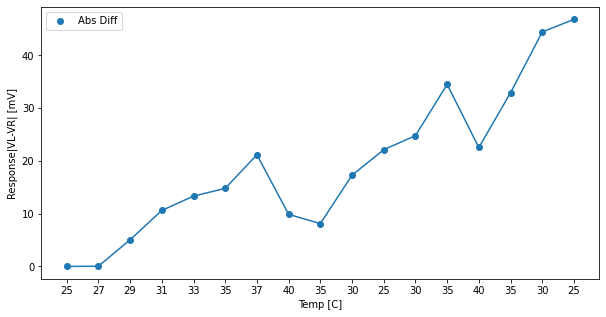

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))
plt.xticks(range(len(order)), order)
plt.scatter(range(len(order)),abs(np.array([i[1]-max_t_ord[0][1] for i in max_t_ord]) - np.array([i[0]-max_t_ord[0][0] for i in max_t_ord]))*1000, label = 'Abs Diff')
plt.plot(range(len(order)),abs(np.array([i[1]-max_t_ord[0][1] for i in max_t_ord]) - np.array([i[0]-max_t_ord[0][0] for i in max_t_ord]))*1000)

plt.legend()
plt.xlabel('Temp [C]')
plt.ylabel('Response|VL-VR| [mV]')

In [ ]:
# saving data in clsx format

data = [[abs(i[0] - max_t_ord[0][0]) for i in max_t_ord],[abs(i[1] - max_t_ord[0][1]) for i in max_t_ord],abs(np.array([i[1]-max_t_ord[0][1] for i in max_t_ord]) - np.array([i[0]-max_t_ord[0][0] for i in max_t_ord])),order]
table = pd.DataFrame(data).transpose().rename(columns = {0: 'Mean_L [V]', 1: 'Mean_R [V]', 2: 'Diff |VR-VL| [V]', 3: 'temperature [C]'}).set_index('temperature [C]')
table.to_excel(r'C:\Users\Desi\Desktop\TesiStanford\images-results\table_TempInsensitivityTest-121323-2.xlsx')